# Exam Project | Face Recognizer
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [1]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
import sys
sys.path.append('../')
from FaceDetector import FaceDetector
from DataGenerator import DataGenerator
from Utilities import Displayer

In [3]:
CLASSES = ['dad', 'mom']
dad_path = '../data/face-data/PersonGroup/Family3-Man'
mom_path = '../data/face-data/PersonGroup/Family3-Lady'

(train_dad_data, test_dad_data) = DataGenerator.generate(dad_path, 100, label=0, test_size=.2)
(train_mom_data, test_mom_data) = DataGenerator.generate(mom_path, 100, label=1, test_size=.2)

(train_images, train_labels) = DataGenerator.merge_shuffle([train_dad_data, train_mom_data])
(test_images, test_labels) = DataGenerator.merge_shuffle([test_dad_data, test_mom_data])

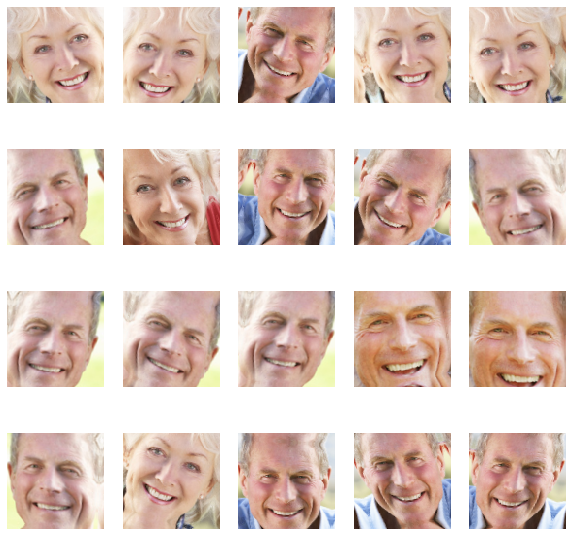

In [4]:
Displayer.images(train_images[200:], 20)

In [5]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Dropout(.2),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # softmax no go
    Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [6]:
loss_func = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 16s 34ms/sample - loss: 0.9268 - accuracy: 0.5104 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 2/10
480/480 [==============================] - 13s 28ms/sample - loss: 0.6469 - accuracy: 0.6083 - val_loss: 0.6074 - val_accuracy: 0.5333
Epoch 3/10
480/480 [==============================] - 14s 28ms/sample - loss: 0.4349 - accuracy: 0.8313 - val_loss: 0.3100 - val_accuracy: 0.8917
Epoch 4/10
480/480 [==============================] - 13s 28ms/sample - loss: 0.3940 - accuracy: 0.8146 - val_loss: 0.2905 - val_accuracy: 0.8750
Epoch 5/10
480/480 [==============================] - 22s 46ms/sample - loss: 0.2147 - accuracy: 0.9271 - val_loss: 0.4064 - val_accuracy: 0.7750
Epoch 6/10
480/480 [==============================] - 28s 59ms/sample - loss: 0.1884 - accuracy: 0.9146 - val_loss: 0.2100 - val_accuracy: 0.9083
Epoch 7/10
480/480 [==============================] - 26s 55ms/sample - loss: 

120/1 - 0s - loss: 0.0597 - accuracy: 0.9833


[0.066896985967954, 0.98333335]

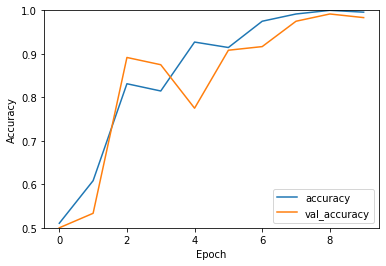

In [8]:
Displayer.acc_history(history)
model.evaluate(test_images, test_labels, verbose=2)

In [18]:
# model.save('../models/sequential_model_acc96_optimized.h5')
model = tf.keras.models.load_model('../models/sequential_model_acc96_fam3.h5')

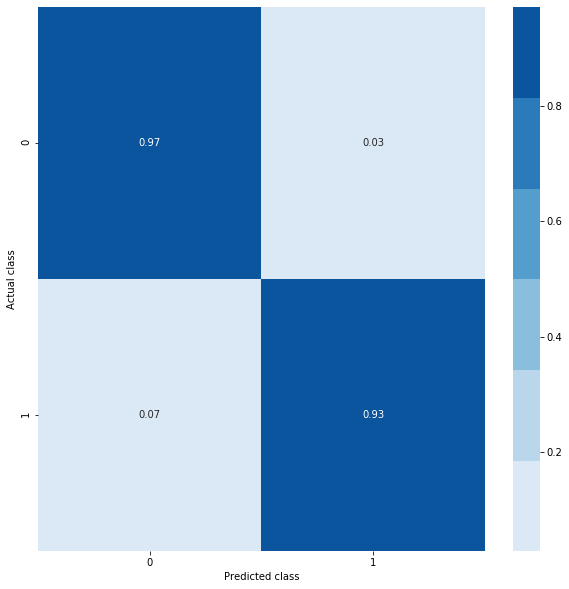

In [19]:
# ...
predictions = model.predict(test_images)
Displayer.conf_matrix(predictions, test_labels)

predictions [[-1.6557426  5.7273226]]
prediction mom


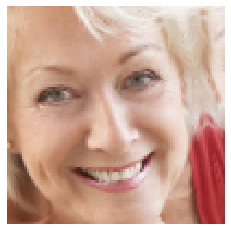

In [20]:
image_index = 80
image = np.array([test_images[image_index]], dtype='float32')

predictions = model.predict(image)
prediction = np.argmax(predictions)

print('predictions', predictions)
print('prediction', CLASSES[prediction])
Displayer.image(test_images[image_index])

___

In [21]:
image_path = '../data/face-data/identification3.jpg'
test_image = cv2.imread(image_path)

faceDetector = FaceDetector('FACE_DEFAULT')
new_test_images = faceDetector.crop_all(test_image)

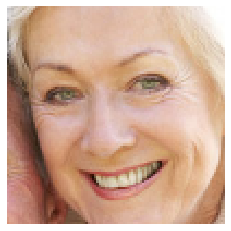

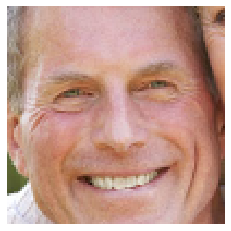

In [22]:
for image in new_test_images:
    Displayer.image(image, bgr=True)

In [14]:
images = np.array(new_test_images, dtype=np.float32)
images = np.array([image/255 for image in images], dtype=np.float32)

In [24]:
predictions = model.predict(np.array([images[0]]))
prediction = np.argmax(predictions)

print('predictions', predictions)
print('prediction', CLASSES[prediction])

predictions [[1.354286  6.1976504]]
prediction mom
